In [9]:
#PoC Code / Not for Prod or Code Demo - Results feed into another layer of ML analysis / Code not pretty 



%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
foam = pd.read_csv('earthquakes-clean.csv')
foam.head()



,id,tsunami,year,eq,region,deaths
0,7614.0,0.0,2007.0,1.6,150.0,3.0
1,10330.0,0.0,2018.0,2.1,10.0,7.0
2,10036.0,0.0,2013.0,2.1,150.0,14.0
3,5754.0,0.0,2004.0,2.2,110.0,0.0
4,9832.0,0.0,2011.0,3.1,150.0,0.0


In [10]:
X = foam[["eq", "region"]]
y = foam["deaths"].values.reshape(-1, 1)
print(X.shape, y.shape)

(6018, 2) (6018, 1)


In [11]:
# Generate 4 clusters of random data.
from sklearn.datasets.samples_generator import make_blobs

#data, _ = make_blobs(n_samples=300, centers=4,
#                     cluster_std=0.60, random_state=0)
X=X.values
X


array([[  1.6, 150. ],
       [  2.1,  10. ],
       [  2.1, 150. ],
       ...,
       [  0. , 130. ],
       [  0. , 140. ],
       [  0. , 140. ]])

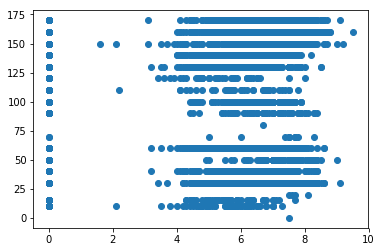

In [12]:
# Plot the data
plt.scatter(X[:, 0], X[:, 1])

In [13]:
# Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [14]:
# Fit the model to the data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
# Predict the clusters
predicted_clusters = kmeans.predict(X)

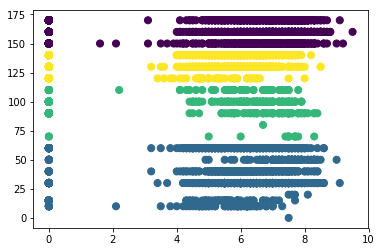

In [16]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=50, cmap='viridis')